In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

/home/don/envUdemy/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/don/envUdemy/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/don/envUdemy/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/don/envUdemy/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#x_train.shape

In [5]:
#single_image = x_train[0]

In [6]:
#single_image

In [7]:
#plt.imshow(single_image)

In [8]:
#y_train

In [9]:
#y_train.shape

In [10]:
#y_example = to_categorical(y_train)

In [11]:
#y_example.shape

In [12]:
#y_example[0]

In [13]:
#y_example[5]

In [14]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train,10)

In [16]:
#single_image.min()

In [17]:
#scale pixel values
x_train = x_train/255

In [18]:
#scale pixel values
x_test = x_test/255

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
#batch size and width,height,color
x_train = x_train.reshape(60000,28,28,1)

In [21]:
x_test = x_test.reshape(10000,28,28,1)

In [22]:
model = Sequential()
#input_shape should match the size of one picture
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),padding='valid', input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#flatten images: preprocessing step
model.add(Flatten())

model.add(Dense(128,activation='relu'))

#output layer: softmax for multiclass problem
#number of neurons should match the number of categories: 0 through 9 = 10 categorical possibilities
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [25]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
         callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.1430 - acc: 0.9565 - val_loss: 0.0559 - val_acc: 0.9826
Epoch 2/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.0497 - acc: 0.9848 - val_loss: 0.0443 - val_acc: 0.9852
Epoch 3/10
60000/60000 [==============================] - 58s 960us/sample - loss: 0.0319 - acc: 0.9897 - val_loss: 0.0343 - val_acc: 0.9884
Epoch 4/10
60000/60000 [==============================] - 47s 777us/sample - loss: 0.0207 - acc: 0.9934 - val_loss: 0.0383 - val_acc: 0.9877


In [26]:
#model evaluation
metrics = pd.DataFrame(model.history.history)

In [27]:
metrics

,loss,acc,val_loss,val_acc
0,0.143003,0.956533,0.055913,0.9826
1,0.049680,0.984817,0.044308,0.9852
2,0.031877,0.989667,0.034327,0.9884
3,0.020724,0.993433,0.038310,0.9877


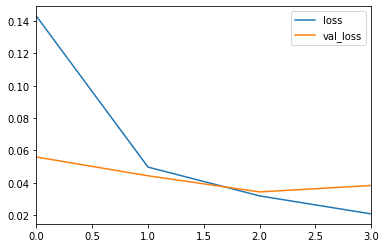

In [28]:
metrics[['loss','val_loss']].plot()

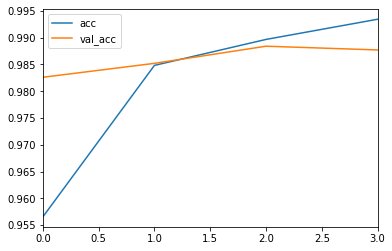

In [29]:
metrics[['acc','val_acc']].plot()

In [30]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.03831030464032083, 0.9877]

In [31]:
predictions=model.predict_classes(x_test)

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.96      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [33]:
confusion_matrix(y_test,predictions)

array([[ 974,    0,    2,    1,    0,    0,    0,    0,    3,    0],
       [   0, 1128,    2,    2,    0,    0,    1,    0,    2,    0],
       [   0,    0, 1020,    3,    0,    0,    0,    3,    6,    0],
       [   0,    0,    0, 1006,    0,    1,    0,    0,    3,    0],
       [   0,    0,    0,    0,  973,    0,    2,    0,    1,    6],
       [   1,    0,    1,    9,    0,  879,    2,    0,    0,    0],
       [   5,    2,    0,    0,    2,    1,  945,    0,    3,    0],
       [   1,    2,    5,    1,    0,    0,    0, 1011,    5,    3],
       [   2,    1,    2,    1,    0,    0,    0,    2,  965,    1],
       [   2,    2,    0,    1,    7,    2,    0,    6,   13,  976]])

In [34]:
import seaborn as sns

In [35]:
my_number = x_test[0]

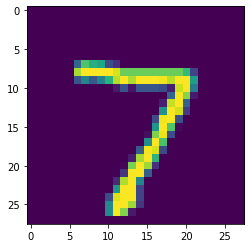

In [36]:
plt.imshow(my_number.reshape(28,28))

In [40]:
#batch size: number of images,width,height,color_channels
pred_arr = model.predict_classes(my_number.reshape(1,28,28,1))